# **EDA and Customer Segmentation using RFM Analysis**

# **Data Exploration**

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read an excel file into a pandas data frame
cust_demo = pd.read_csv('Cust_Demo_Cleaned.csv')
cust_addr = pd.read_csv('Cust_Addr_Cleaned.csv')
trans     = pd.read_csv('Trans_Cleaned.csv')
new_cust  = pd.read_csv('New_Cust_Cleaned.csv')

In [3]:
# Combine Customer Demographic and Customer Address data frame together on matching the customer_id column
df_cust = pd.merge(cust_demo, cust_addr, how = 'inner', on='customer_id')
df_cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,Age_group,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,69.0,60-70,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,42.0,40-50,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,-,Male,33,1961-10-03,61.0,60-70,Other,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,6,Curr,Duckhouse,Male,35,1966-09-16,56.0,50-60,Other,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9
4,7,Fina,Merali,Female,6,1976-02-23,47.0,40-50,Other,Financial Services,Affluent Customer,N,Yes,11.0,4 Delaware Trail,2210,NSW,Australia,9


In [4]:
# Print a concise summary of a data frame
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 0 to 3250
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3251 non-null   int64  
 1   first_name                           3251 non-null   object 
 2   last_name                            3251 non-null   object 
 3   gender                               3251 non-null   object 
 4   past_3_years_bike_related_purchases  3251 non-null   int64  
 5   DOB                                  3251 non-null   object 
 6   Age                                  3251 non-null   float64
 7   Age_group                            3251 non-null   object 
 8   job_title                            3251 non-null   object 
 9   job_industry_category                3251 non-null   object 
 10  wealth_segment                       3251 non-null   object 
 11  deceased_indicator            

In [5]:
# Find duplicate rows in a data frame
df_cust.duplicated().sum()

0

In [6]:
# Check if any value is NaN in a pandas data frame
df_cust.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
Age                                    0
Age_group                              0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64

In [7]:
# Change data type of the Age_group column from int to category
cust_demo['Age_group'] = cust_demo['Age_group'].astype('category')

In [8]:
cust_demo['Age_group']

0       60-70
1       40-50
2       60-70
3       60-70
4       50-60
        ...  
3249    30-40
3250    40-50
3251    40-50
3252    20-30
3253    40-50
Name: Age_group, Length: 3254, dtype: category
Categories (8, object): ['1-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

In [9]:
# Create a color palette based on the number of unique age groups in the customer demographics
palette = sns.color_palette('Blues_r', len(cust_demo['Age_group'].unique()))

# Create where the keys are the age group categories and the values are the corresponding colors from the palette
color_dict = {key :value for key, value in zip(cust_demo['Age_group'].cat.categories, palette)}

# The age groups are sorted in ascending order based on the number of customers in each group
age_order = cust_demo['Age_group'].value_counts()

#The age group categories are extracted and stored as a list
age_counts = cust_demo['Age_group'].cat.categories

# Created where the keys are the indices of the age groups in the sorted age_order and the values are the corresponding colors from the color_dict
color_order = {age_order.index[i]:color_dict[age_group] for i,age_group in enumerate(age_counts)}

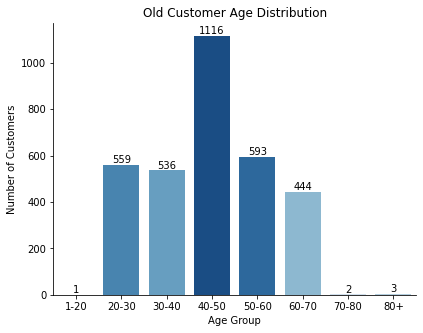

In [10]:
# Create the visualisation for Old Customer Age Distribution
plt.figure(figsize=(6.5,5))
old_age_dis = sns.countplot(data = cust_demo, x = 'Age_group',palette = color_order)
old_age_dis.bar_label(old_age_dis.containers[0])
old_age_dis.set(title = 'Old Customer Age Distribution', xlabel='Age Group', ylabel='Number of Customers')
sns.despine(left = False, bottom = False,offset = None, trim = False)
plt.show()

In [11]:
# Group age in 10 years range for New Customer data frame
Age_group_new = pd.cut(new_cust['Age'], bins=[1, 20, 30, 40, 50, 60, 70, 80, 100],
                    labels=['1-20', '20-30', '30-40', '40-50', '50-60','60-70','70-80','80+'])

In [12]:
# Insert the Age_group column after the Age column
new_cust.insert(new_cust.columns.get_loc('Age')+1, column='Age_group', value = Age_group_new)

In [13]:
new_cust.loc[:4,['Age','Age_group']]

,Age,Age_group
0,65.0,60-70
1,52.0,50-60
2,48.0,40-50
3,44.0,40-50
4,57.0,50-60


In [14]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,Age_group,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,65.0,60-70,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,52.0,50-60,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,48.0,40-50,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,44.0,40-50,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,57.0,50-60,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [15]:
# Find the number of unique values in the Age_group column
new_cust['Age_group'].value_counts()

40-50    201
60-70    143
50-60    138
20-30    135
30-40     84
70-80     81
80+       36
1-20       0
Name: Age_group, dtype: int64

In [16]:
# The age groups are sorted in ascending order based on the number of customers in each group
age_order = new_cust['Age_group'].value_counts()

#The age group categories are extracted and stored as a list
age_counts = new_cust['Age_group'].cat.categories

# Created where the keys are the indices of the age groups in the sorted age_order and the values are the corresponding colors from the color_dict
color_order = {age_order.index[i]:color_dict[age_group] for i,age_group in enumerate(age_counts)}

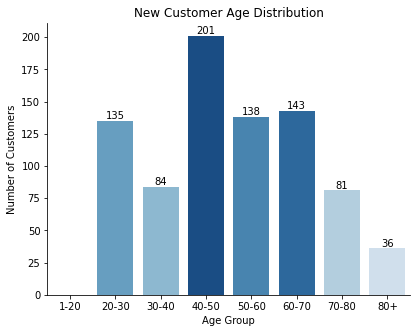

In [17]:
# Create the visualisation for New Customer Age Distribution
plt.figure(figsize=(6.5,5))
new_age_dis = sns.countplot(data = new_cust, x = 'Age_group',palette = color_order)
new_age_dis.bar_label(new_age_dis.containers[0])
new_age_dis.set(title = 'New Customer Age Distribution', xlabel = 'Age Group', ylabel = 'Number of Customers')
sns.despine(left = False, bottom = False)
plt.show()

In [18]:
# Create new old_new columns for customer status
cust_demo['old_new'] = 'Old'
new_cust['old_new'] = 'New'

In [19]:
# Create the df_old_new data frame from Customer Demographic and New Customer data frame in order to inform customer status of their age group
df_old_new = pd.concat([cust_demo, new_cust])
df_age_cate = df_old_new[['Age_group','old_new']]
df_age_cate

,Age_group,old_new
0,60-70,Old
1,40-50,Old
2,60-70,Old
3,60-70,Old
4,50-60,Old
...,...,...
813,60-70,New
814,20-30,New
815,60-70,New
816,60-70,New


In [20]:
# Using Age_group as categorie type
age_cat = cust_demo['Age_group'].cat.categories
age_cat 

Index(['1-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'], dtype='object')

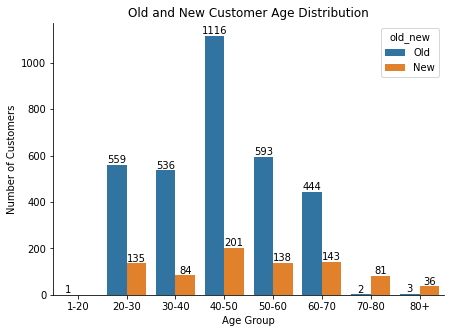

In [21]:
# Create the visualisation for Old and New Customer Age Distribution
plt.figure(figsize=(7,5))
age_dis = sns.countplot(data = df_old_new, x = 'Age_group', hue = 'old_new', order = age_cat)
age_dis.bar_label(age_dis.containers[0])
age_dis.bar_label(age_dis.containers[1])
age_dis.set(title = 'Old and New Customer Age Distribution', xlabel='Age Group', ylabel='Number of Customers')
sns.despine(left = False, bottom = False)
plt.show()

### **Old and New Customer Age Distribution**


*   The majority of customers, both old and new, are between the ages of 40 and 50. people belonging to this age group are most likely to purchase frequently.
*   According to the new customers, the most preferred age ranges are 40 to 70, with 20 to 30 years old coming in second.








In [22]:
# Create old_wealth_seg table by using pivot table for further analysis considering the numerber of each wealth segment grouped by age group
old_wealth_seg = pd.pivot_table(cust_demo, values = 'customer_id', index = ['Age_group'], columns = ['wealth_segment'], aggfunc = 'count')
column_order = ['Mass Customer', 'High Net Worth', 'Affluent Customer']
old_wealth_seg = old_wealth_seg.reindex(column_order, axis=1)
old_wealth_seg

wealth_segment,Mass Customer,High Net Worth,Affluent Customer
Age_group,,,
1-20,0,1,0
20-30,271,138,150
30-40,267,145,124
40-50,565,286,265
50-60,301,145,147
60-70,229,110,105
70-80,0,1,1
80+,2,0,1


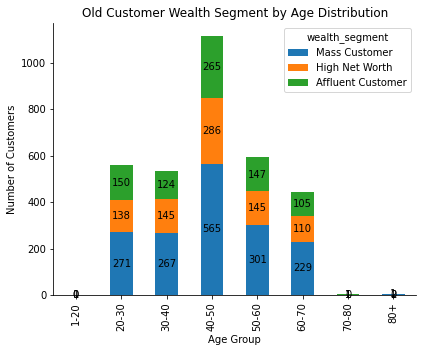

In [23]:
# Create the visualisation for Old Customer Wealth Segment by Age Distribution
old_wealth_seg = old_wealth_seg.plot(kind ='bar', stacked = True,figsize=(6.5,5))
old_wealth_seg.bar_label(old_wealth_seg.containers[0],label_type ='center')
old_wealth_seg.bar_label(old_wealth_seg.containers[1],label_type ='center')
old_wealth_seg.bar_label(old_wealth_seg.containers[2],label_type ='center')
old_wealth_seg.set(title = 'Old Customer Wealth Segment by Age Distribution', xlabel = 'Age Group', ylabel = 'Number of Customers')
sns.despine(left = False, bottom = False)
plt.show()

In [24]:
# Create new_wealth_seg table by using pivot table for further analysis considering the numerber of each wealth segment grouped by age group
new_wealth_seg = pd.pivot_table(new_cust, values = 'first_name', index = ['Age_group'], columns = ['wealth_segment'], aggfunc = 'count')
new_wealth_seg = new_wealth_seg.reindex(column_order, axis=1)
new_wealth_seg

wealth_segment,Mass Customer,High Net Worth,Affluent Customer
Age_group,,,
1-20,0,0,0
20-30,60,32,43
30-40,43,30,11
40-50,105,46,50
50-60,78,27,33
60-70,70,42,31
70-80,41,19,21
80+,17,10,9


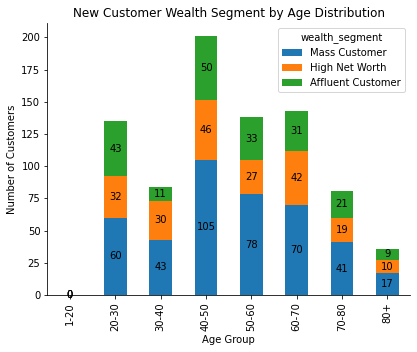

In [25]:
# Create the visualisation for Old Customer Wealth Segment by Age Distribution
new_wealth_seg = new_wealth_seg.plot(kind ='bar', stacked = True,figsize=(6.5,5))
new_wealth_seg.bar_label(new_wealth_seg.containers[0],label_type ='center')
new_wealth_seg.bar_label(new_wealth_seg.containers[1],label_type ='center')
new_wealth_seg.bar_label(new_wealth_seg.containers[2],label_type ='center')
new_wealth_seg.set(title = 'New Customer Wealth Segment by Age Distribution', xlabel = 'Age Group', ylabel = 'Number of Customers')
sns.despine(left = False, bottom = False)
plt.show()

### **Old and New Customer Wealth Segment by Age Distribution**
The number of mass customers is the highest, followed by high net worth customers, and finally by affluent customers. 

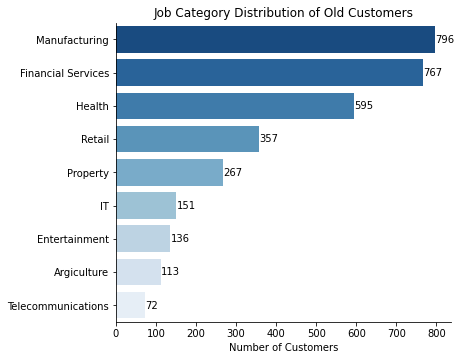

In [26]:
# Create the visualisation for Job Category Distribution of Old Customers
plt.figure(figsize=(6,5.5))
old_job_dis = sns.countplot(data = cust_demo, y = 'job_industry_category',order = cust_demo['job_industry_category'].value_counts().index,palette ='Blues_r')
old_job_dis.bar_label(old_job_dis.containers[0])
old_job_dis.set(title = 'Job Category Distribution of Old Customers', xlabel = 'Number of Customers', ylabel =  None)
sns.despine(left = False, bottom = False)
plt.show()

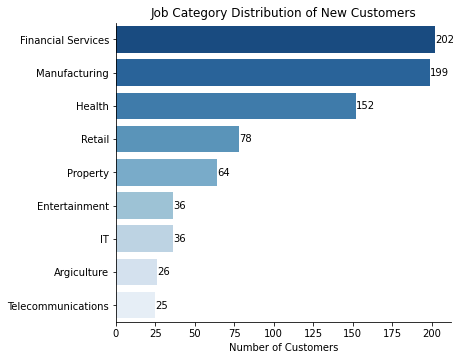

In [27]:
# Create the visualisation for Job Category Distribution of New Customers
plt.figure(figsize=(6,5.5))
new_job_dis = sns.countplot(data = new_cust, y = 'job_industry_category',order = new_cust['job_industry_category'].value_counts().index,palette ='Blues_r')
new_job_dis.bar_label(new_job_dis.containers[0])
new_job_dis.set(title = 'Job Category Distribution of New Customers', xlabel = 'Number of Customers', ylabel =  None)
sns.despine(left = False, bottom = False)
plt.show()

In [28]:
# Create the df_job_dis data frame from df_old_new data frame in order to inform customer status of their job category
df_job_dis  = df_old_new[['job_industry_category','old_new']]
df_job_dis 

,job_industry_category,old_new
0,Health,Old
1,Financial Services,Old
2,Property,Old
3,IT,Old
4,Retail,Old
...,...,...
813,Financial Services,New
814,Health,New
815,Financial Services,New
816,Financial Services,New


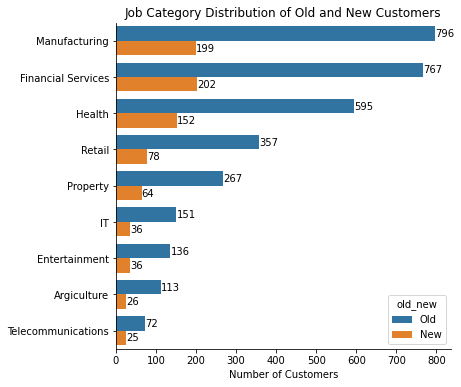

In [30]:
# Create the visualisation for Job Category Distribution of Old and New Customers
plt.figure(figsize=(6,6))
job_dis = sns.countplot(data = df_job_dis, y = 'job_industry_category',hue = 'old_new' ,order = cust_demo['job_industry_category'].value_counts().index )
job_dis.bar_label(job_dis.containers[0])
job_dis.bar_label(job_dis.containers[1])
job_dis.set(title = 'Job Category Distribution of Old and New Customers', xlabel = 'Number of Customers', ylabel =  None)
sns.despine(left = False, bottom = False)
plt.show()

### **Job Category Distribution of Old and New Customers**

*   The top three industries are Manufacturing, Financial Services and the Health industry which are half of customers work in both old and new customer.
*   The rest of the industries seem to remain in the same proportion with both old and new customers.



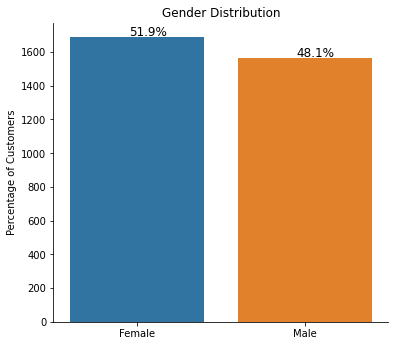

In [31]:
# Create the visualisation for Gender Distribution of Old Customers
plt.figure(figsize=(6,5.5))
gender_dis = sns.countplot(data = cust_demo, x = 'gender',order = cust_demo['gender'].value_counts().index)
total = float(len(cust_demo))
for p in gender_dis.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() 
    gender_dis.annotate(percentage, (x, y+6), size = 12)
gender_dis.set(title= 'Gender Distribution', xlabel = None, ylabel='Percentage of Customers')
sns.despine(left = False, bottom = False)
plt.show()

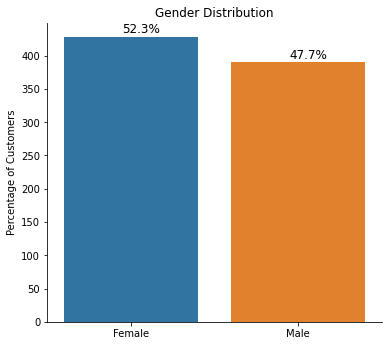

In [32]:
# Create the visualisation for Gender Distribution of New Customers
plt.figure(figsize=(6,5.5))
gender_dis = sns.countplot(data = new_cust, x = 'gender',order = new_cust['gender'].value_counts().index)
total = float(len(new_cust))
for p in gender_dis.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() 
    gender_dis.annotate(percentage, (x, y+6), size = 12)
gender_dis.set(title= 'Gender Distribution', xlabel = None, ylabel='Percentage of Customers')
sns.despine(left = False, bottom = False)
plt.show()

### **Gender Distribution of Old and New Customers**
the number of female customers is higher than male customers but the difference is not significant. 

*   The percentage of female customers is slightly higher than male customers.






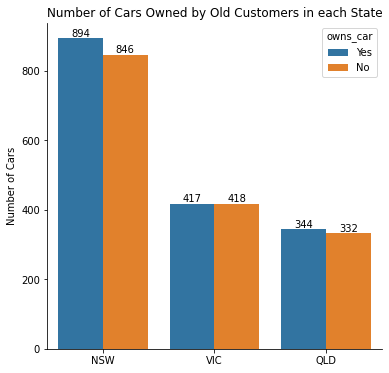

In [33]:
# Create the visualisation for Number of Cars Owned by Old Customers in New South Wales, Victoria and Queensland
plt.figure(figsize=(6,6))
old_own_car = sns.countplot(data = df_cust, x = 'state', hue = 'owns_car', order = df_cust['state'].value_counts().index)
old_own_car.bar_label(old_own_car.containers[0])
old_own_car.bar_label(old_own_car.containers[1])
old_own_car.set(title = 'Number of Cars Owned by Old Customers in each State', xlabel = None, ylabel = 'Number of Cars')
sns.despine(fig = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

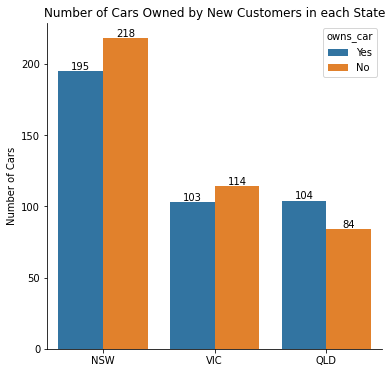

In [34]:
# Create the visualisation for Number of Cars Owned by New Customers in New South Wales, Victoria and Queensland
plt.figure(figsize=(6,6))
new_own_car = sns.countplot(data = new_cust, x = 'state', hue = 'owns_car', order = new_cust['state'].value_counts().index)
new_own_car.bar_label(new_own_car.containers[0])
new_own_car.bar_label(new_own_car.containers[1])
new_own_car.set(title = 'Number of Cars Owned by New Customers in each State', xlabel = None, ylabel = 'Number of Cars')
sns.despine(fig = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

### **Number of Cars Owned by Old and New Customers**

*   In old customers, the number of customers who own cars is slightly higher than the number of customers who do not own cars.

*   In new customers, the number of customers who own cars is slightly lower than the number of customers who do not own cars in New South Wales and Victoria.

*   For both old and new customers, New South Wales is the highest number of people.










# **RFM Analysis for Customer Segmentation**

In [35]:
# Combine Transactions and Customer Demographic with Address data frame together on matching the customer_id column
trans_cust = pd.merge(trans, df_cust, how = 'inner', on = 'customer_id')

In [36]:
trans_cust.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5


In [37]:
# Print a concise summary of a data frame
trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15695 entries, 0 to 15694
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       15695 non-null  int64  
 1   product_id                           15695 non-null  int64  
 2   customer_id                          15695 non-null  int64  
 3   transaction_date                     15695 non-null  object 
 4   online_order                         15695 non-null  float64
 5   order_status                         15695 non-null  object 
 6   brand                                15695 non-null  object 
 7   product_line                         15695 non-null  object 
 8   product_class                        15695 non-null  object 
 9   product_size                         15695 non-null  object 
 10  list_price                           15695 non-null  float64
 11  standard_cost               

In [38]:
# Find duplicate rows in a data frame
trans_cust.duplicated().sum()

0

In [39]:
# Check if any value is NaN in a pandas data frame
trans_cust.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
profit                                 0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
Age                                    0
Age_group                              0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicat

In [40]:
# Find the last purchase date
trans_cust['transaction_date'] = pd.to_datetime(trans_cust['transaction_date'])
recent_purchase = trans_cust['transaction_date'].max()
recent_purchase

Timestamp('2017-12-30 00:00:00')

In [41]:
# Calculate the number of days since last purchase for each customer
trans_cust['last_purchase_days'] = (recent_purchase - trans_cust['transaction_date']).dt.days

In [42]:
trans_cust['last_purchase_days']

0        308
1         75
2        248
3        223
4         86
        ... 
15690    180
15691    312
15692    263
15693    210
15694     91
Name: last_purchase_days, Length: 15695, dtype: int64

**Create rfm data frame contain:**


1.   **Recency:** How recently has the customer made a purchase   
2.   **Frequency:**  How often does the customer make a purchase 
3.   **Monetary:** How much does the customer spend on product purchases



In [43]:
rfm = trans_cust.groupby('customer_id',as_index = False).agg({
    'last_purchase_days': lambda x: x.min(),
    'product_id': lambda x: len(x),
    'profit': lambda x: x.sum()
  }
)

In [44]:
# Change column names in rfm data frame
rfm = rfm.rename(columns = {
    'last_purchase_days': 'recency', 
    'product_id': 'frequency', 
    'profit': 'monetary'
    }
)

In [45]:
rfm.head()

,customer_id,recency,frequency,monetary
0,1,7,11,3018.09
1,2,128,3,2226.26
2,4,195,2,220.57
3,6,64,5,3946.55
4,7,253,3,220.11


In [46]:
# Print some basic statistical of a data frame 
rfm.describe()

,customer_id,recency,frequency,monetary
count,2847.000000,2847.000000,2847.000000,2847.000000
mean,1743.383562,63.069898,5.512821,3028.943056
std,1012.400318,59.553843,2.261325,1751.719206
min,1.000000,0.000000,1.000000,15.080000
25%,858.500000,18.000000,4.000000,1758.210000
50%,1731.000000,45.000000,5.000000,2774.480000
75%,2624.500000,88.000000,7.000000,4061.950000
max,3500.000000,353.000000,14.000000,11668.950000


**Computing Quantile of RFM values**

qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

**Lower recency** is better, so if recency is low, it will get a high r_score.

**Higher frequency** is better, so if frequency is high, it will get a high f_score.

**Higher monetary** is better, so if monetary is high, it will get a high m_score.


In [47]:
rfm['r_score'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])
rfm['f_score'] = pd.qcut(rfm['frequency'], 4, ['1','2','3','4'])
rfm['m_score'] = pd.qcut(rfm['monetary'], 4, ['1','2','3','4'])
rfm.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score
0,1,7,11,3018.09,4,4,3
1,2,128,3,2226.26,1,1,2
2,4,195,2,220.57,1,1,1
3,6,64,5,3946.55,2,2,3
4,7,253,3,220.11,1,1,1


In [48]:
# Change data type of the rfm values from category to int
rfm = rfm.astype({'r_score': 'int', 'f_score': 'int','m_score': 'int'})
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  2847 non-null   int64  
 1   recency      2847 non-null   int64  
 2   frequency    2847 non-null   int64  
 3   monetary     2847 non-null   float64
 4   r_score      2847 non-null   int64  
 5   f_score      2847 non-null   int64  
 6   m_score      2847 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 155.8 KB


In [49]:
# Create an rfm_class column to segment the customers by combining rfm values
rfm['rfm_class'] = 100 * rfm['r_score'] + 10 * rfm['f_score'] + rfm['m_score']

rfm.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_class
0,1,7,11,3018.09,4,4,3,443
1,2,128,3,2226.26,1,1,2,112
2,4,195,2,220.57,1,1,1,111
3,6,64,5,3946.55,2,2,3,223
4,7,253,3,220.11,1,1,1,111


**Best Customers:**  Highly engaged customers who have bought recently, buy often and spend the most

**Loyal Customers:** Customers who buy the most often

**Big Spenders:** Customers who have spent the most

**Promising:** Customers who return often, but do not spend a lot

**Recent Customers:** Customers who bought recently, but not often

**Inactive Customer:** Great past customers who haven't bought in a while

**Hibernating:** Last purchase was long time ago and low number of orders


In [50]:
# Segment the customers based on their rfm_score by grouping them into different categories
seg_map = {
    r'44[3-4]': 'Best Customers',
    r'[3-4][3-4][2-4]': 'Loyal Customers',
    r'[2-4][1-3][3-4]': 'Big Spenders',
    r'[1-4][2-4][1-2]': 'Promising',
    r'[3-4]1[1-4]': 'Recent Customers',
    r'[1-2][1-4][3-4]': 'Inactive Customer',
    r'[1-2]1[1-2]': 'Hibernating'
    
}

rfm['Segment'] = rfm['r_score'].map(str) + rfm['f_score'].map(str)+ rfm['m_score'].map(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_class,Segment
0,1,7,11,3018.09,4,4,3,443,Best Customers
1,2,128,3,2226.26,1,1,2,112,Hibernating
2,4,195,2,220.57,1,1,1,111,Hibernating
3,6,64,5,3946.55,2,2,3,223,Big Spenders
4,7,253,3,220.11,1,1,1,111,Hibernating


In [51]:
# Change data type of the rfm values from str to category
rfm['Segment'] = rfm['Segment'].astype('category')

# Change the order of a customer segments
rfm['Segment'] = rfm['Segment'].cat.set_categories(['Hibernating', 'Inactive Customer','Recent Customers','Promising', 'Big Spenders','Loyal Customers','Best Customers'], ordered=True)

In [52]:
# Sorting the data frame with Segment in descending order and customer_id in ascending order
Top_1000 = rfm.sort_values(['Segment','customer_id'], ascending = [False,True])

# Reset the index of the data frame
Top_1000.reset_index(drop=True, inplace=True)
Top_1000

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_class,Segment
0,1,7,11,3018.09,4,4,3,443,Best Customers
1,25,5,12,5333.66,4,4,4,444,Best Customers
2,37,7,9,6338.49,4,4,4,444,Best Customers
3,76,1,8,2868.16,4,4,3,443,Best Customers
4,87,18,9,3740.76,4,4,3,443,Best Customers
...,...,...,...,...,...,...,...,...,...
2842,3471,148,4,1914.10,1,1,2,112,Hibernating
2843,3491,189,4,1430.28,1,1,1,111,Hibernating
2844,3492,80,3,2193.81,2,1,2,212,Hibernating
2845,3496,256,4,2045.84,1,1,2,112,Hibernating


In [53]:
# Find the number of unique values in the Segment column
Top_1000['Segment'].value_counts().sort_index(ascending = False)

Best Customers       178
Loyal Customers      603
Big Spenders         436
Promising            435
Recent Customers     288
Inactive Customer    349
Hibernating          558
Name: Segment, dtype: int64

In [54]:
# Find top 1000 customers 
Top_1000.loc[:999, 'top_1000'] = 'Yes'
Top_1000.loc[1000:, 'top_1000'] = 'No'

In [55]:
# Create order of customer segmentation
order = ['Best Customers','Loyal Customers', 'Big Spenders','Promising','Recent Customers','Inactive Customer','Hibernating']

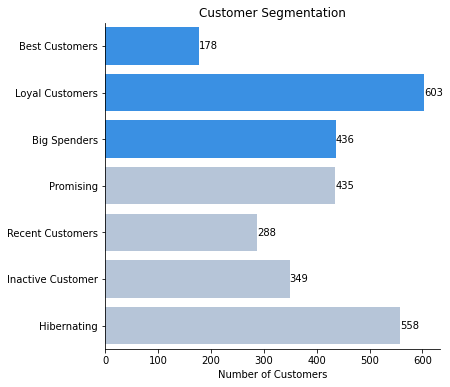

In [56]:
# Create the visualisation for Customer Segmentation
plt.figure(figsize=(6,6))
rfm_bar = sns.countplot(data = rfm, y = 'Segment',order = order,palette = ['dodgerblue','dodgerblue','dodgerblue','lightsteelblue','lightsteelblue','lightsteelblue','lightsteelblue'])
rfm_bar.bar_label(rfm_bar.containers[0])
rfm_bar.set(title = 'Customer Segmentation', xlabel='Number of Customers', ylabel = None)
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

### **Customer Segmentation**
As shown in the graph, customers are segmented into different categories, such as best customers, loyal customers,and big spenders which are the top three categories.




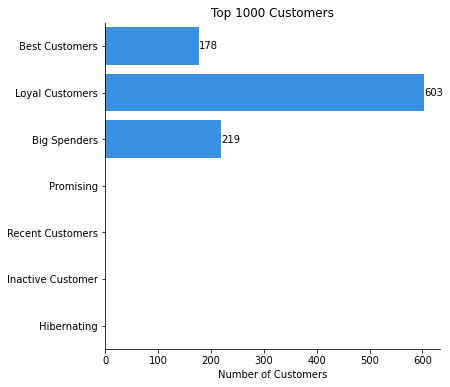

In [57]:
# Create the visualisation for Customer Segmentation
plt.figure(figsize=(6,6))
top_bar = sns.countplot(data = Top_1000.head(1000), y = 'Segment',order = order,color = 'dodgerblue')
top_bar.bar_label(top_bar.containers[0])
top_bar.set(title = 'Top 1000 Customers', xlabel='Number of Customers', ylabel = None)
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

### **Top 1000 Customers**

As shown in the graph, the top 1000 customers are from the top three categories and are characterized by recent frequent purchases and high revenue generation.

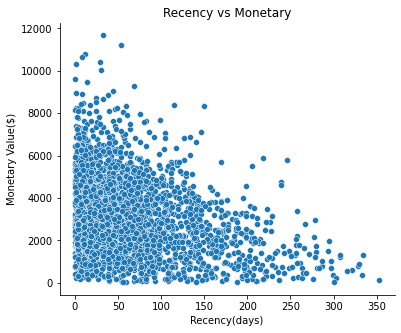

In [58]:
# Create the visualisation for Recency vs Monetary 
plt.figure(figsize=(6,5))
recency_monetary = sns.scatterplot(data = rfm, x = 'recency', y = 'monetary')
recency_monetary.set(title = 'Recency vs Monetary', xlabel = 'Recency(days)', ylabel = 'Monetary Value($)')
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

### **Recency vs Monetary**
It can be observed from the graph that customers who purchased more recently have generated more revenue compared to those who visited a long time ago.

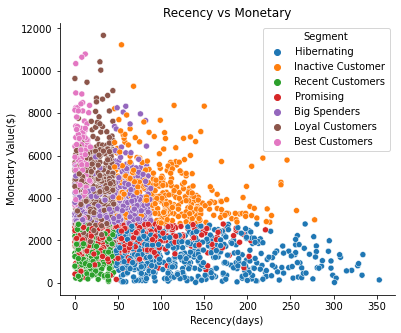

In [59]:
# Create the visualisation for Recency vs Monetary wtih Segment
plt.figure(figsize=(6,5))
recency_monetary = sns.scatterplot(data = rfm ,x = 'recency', y = 'monetary', hue = rfm['Segment'])
recency_monetary.set(title = 'Recency vs Monetary', xlabel = 'Recency(days)', ylabel = 'Monetary Value($)')
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

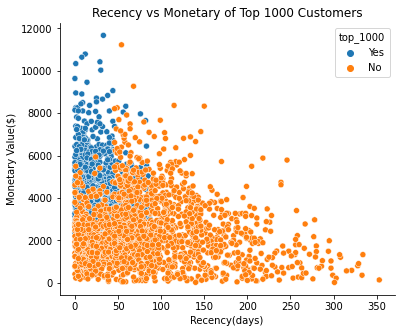

In [60]:
# Create the visualisation for Recency vs Monetary from Top 1000 customers
plt.figure(figsize=(6,5))
recency_monetary = sns.scatterplot(data = Top_1000, x = 'recency', y = 'monetary', hue = Top_1000['top_1000'])
recency_monetary.set(title = 'Recency vs Monetary of Top 1000 Customers', xlabel = 'Recency(days)', ylabel = 'Monetary Value($)')
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

### **Recency vs Monetary of Top 1000 Customers**
The graph shows that the customers who have made a large purchase recently are likely to be top customers(Best Customers, Loyal Customers, Big Spenders).

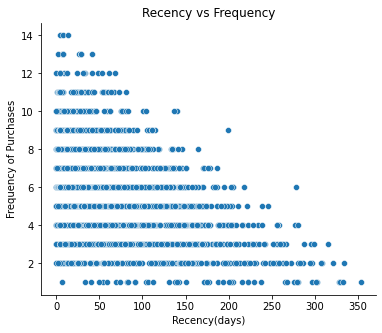

In [61]:
# Create the visualisation for Recency vs Frequency
plt.figure(figsize=(6,5))
recency_frequency = sns.scatterplot(data = rfm, x = 'recency', y = 'frequency')
recency_frequency.set(title = 'Recency vs Frequency', xlabel = 'Recency(days)', ylabel = 'Frequency of Purchases')
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

### **Recency vs Frequency**
As shown in the graph, The customers who visited in the recent past are more likely to return compared to those who visited long time ago. As such, higher frequency would be associated with the most recent visits.

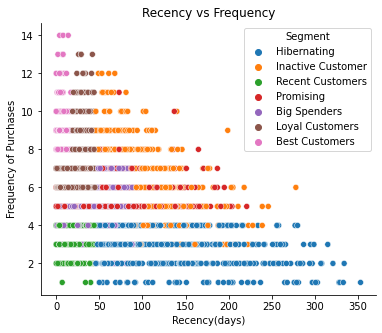

In [62]:
# Create the visualisation for Recency vs Frequency wtih Segment
plt.figure(figsize=(6,5))
recency_frequency = sns.scatterplot(data = rfm, x = 'recency', y = 'frequency', hue = rfm['Segment'])
recency_frequency.set(title = 'Recency vs Frequency', xlabel = 'Recency(days)', ylabel = 'Frequency of Purchases')
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

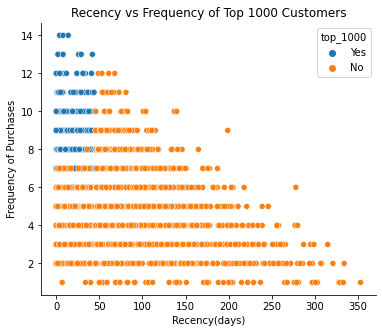

In [63]:
# Create the visualisation for Recency vs Frequency  from Top 1000 customers
plt.figure(figsize=(6,5))
recency_frequency = sns.scatterplot(data = Top_1000, x = 'recency', y = 'frequency', hue = Top_1000['top_1000'])
recency_frequency.set(title = 'Recency vs Frequency of Top 1000 Customers', xlabel = 'Recency(days)', ylabel = 'Frequency of Purchases')
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

###**Recency vs Frequency of Top 1000 Customers**
The graph shows that the customers who have visited recently and frequently are likely to be top customers. 

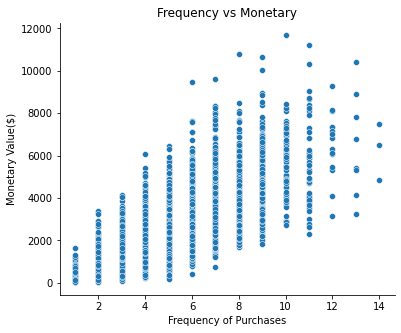

In [64]:
# Create the visualisation for Frequency vs Monetary
plt.figure(figsize=(6,5))
frequency_monetary = sns.scatterplot(data = rfm, x = 'frequency', y = 'monetary')
frequency_monetary.set(title = 'Frequency vs Monetary', xlabel = 'Frequency of Purchases', ylabel = 'Monetary Value($)')
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

### **Frequency vs Monetary**
From the graph, it can be concluded that there is aa positive relationship between frequency and monetary.

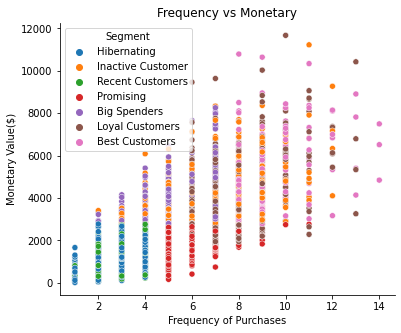

In [65]:
# Create the visualisation for Frequency vs Monetary wtih segment
plt.figure(figsize=(6,5))
frequency_monetary = sns.scatterplot(data = rfm, x = 'frequency', y = 'monetary',hue = rfm['Segment'])
frequency_monetary.set(title = 'Frequency vs Monetary', xlabel = 'Frequency of Purchases', ylabel = 'Monetary Value($)')
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

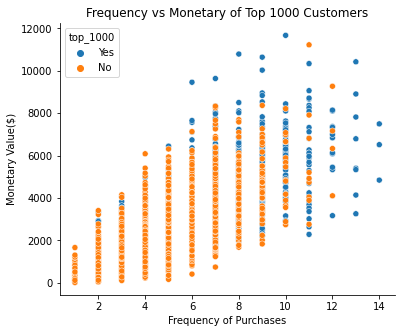

In [66]:
# Create the visualisation for Frequency vs Monetary from Top 1000 customers
plt.figure(figsize=(6,5))
frequency_monetary = sns.scatterplot(data = Top_1000, x = 'frequency', y = 'monetary',hue = Top_1000['top_1000'])
frequency_monetary.set(title = 'Frequency vs Monetary of Top 1000 Customers', xlabel = 'Frequency of Purchases', ylabel = 'Monetary Value($)')
sns.despine(fig  = None, ax = None, top = True, right = True, left = False, bottom = False, offset = None, trim = False)
plt.show()

###**Frequency vs Monetary of Top 1000 Customers**
Looking at the figure, we can see that the frequency of visits increases, the revenue generated also increases. Customers who visit more frquently are your Best Customers, Loyal Customers and Big Spenders and they drive higher revenue.


In [70]:
# Exports data frame to a CSV file 
Top_1000.to_csv('Top_1000_Customers.csv')